In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn

warnings.filterwarnings("ignore")

## 1. Combined Cycle Power Plant Data Set

### a) Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
data = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx', sheet_name = 0, engine='openpyxl')  
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### b) Exploring the data

##### i) How many rows and columns are present? What do the rows and columns represent?

In [3]:
row = len(data)
print("Number of rows in dataset: " + str(row))

Number of rows in dataset: 9568


In [4]:
col = len(data.columns)
print("Number of columns in dataset: " + str(col))

Number of columns in dataset: 5


Number of rows in dataset: 9568 <br>
Number of columns in dataset: 5 <br>

Rows represent number of unique data points (samples) that we have <br>
Columns represent predictors(features) that can be used as input data for our models
Columns - <br>
AT - Ambient Temperature <br>
V - Exhaust Vacuum <br>
AP - Ambient Pressure <br>
RH - Relative Humidity <br>
PE - Electrical Output <br>

##### ii) Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

Describe your findings <br>

Positive correlations - As the value of one variable increases, the value of other variable increases too.
1. AT and V 
2. AP and RH
3. AP and PE
4. RH and PE

Negative correlations - As the value of one variable increases, the value of other variable decreases. 
1. AT and AP 
2. AT and RH
3. AT and PE
4. V and RH 
5. V and PE

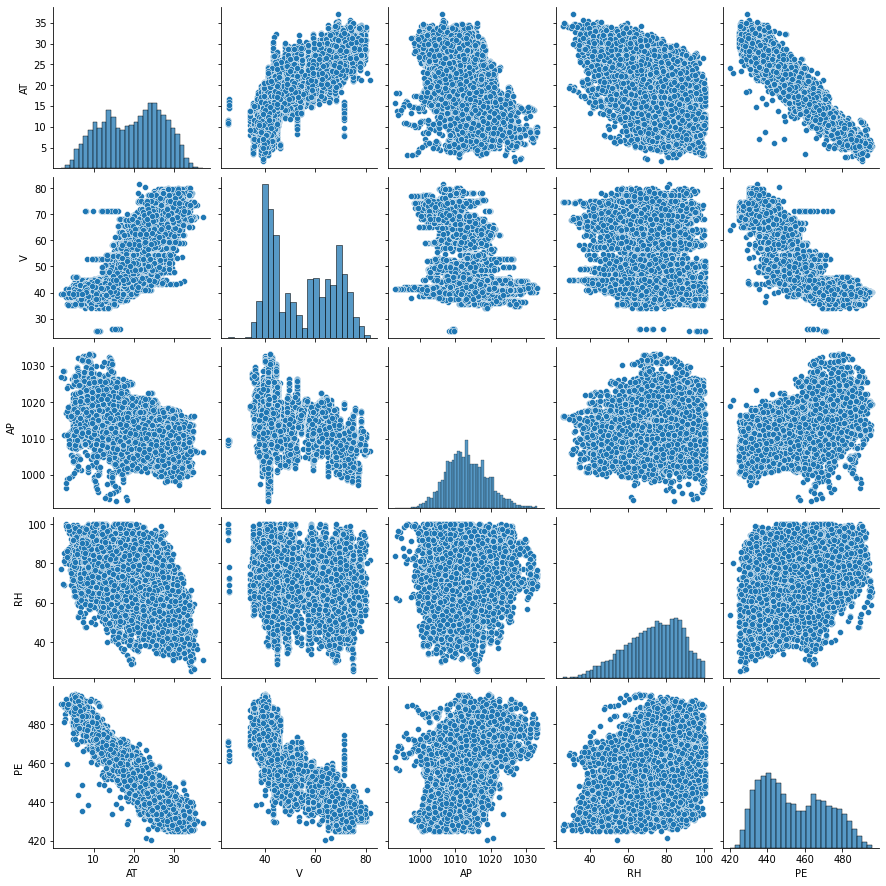

In [5]:
sns.pairplot(data=data, vars=['AT', 'V', 'AP', 'RH','PE'])

Following shows correlation of dependent variable with each independent variable. Dependent variable PE has negative correlation with AT and V and positive correlation with AP and RH.

In [6]:
data[data.columns[:]].corr()['PE'][:]

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

##### iii) What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
summary = data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

In [8]:
summary.loc["range"] = [data["AT"].max() - data["AT"].min(),
                                  data["V"].max() - data["V"].min(),
                                  data["AP"].max() - data["AP"].min(),
                                  data["RH"].max() - data["RH"].min(),
                                  data["PE"].max() - data["PE"].min()]

summary.loc["inter quartile range"] = [data["AT"].quantile(0.75) - data["AT"].quantile(0.25),
                                  data["V"].quantile(0.75) - data["V"].quantile(0.25),
                                  data["AP"].quantile(0.75) - data["AP"].quantile(0.25),
                                  data["RH"].quantile(0.75) - data["RH"].quantile(0.25),
                                  data["PE"].quantile(0.75) - data["PE"].quantile(0.25)]

summary.loc["median"] = [data["AT"].median(),
                                  data["V"].median(),
                                  data["AP"].median(),
                                  data["RH"].median(),
                                  data["PE"].median()]

summary

,AT,V,AP,RH,PE
count,9568.00000,9568.00000,9568.00000,9568.00000,9568.00000
mean,19.65123,54.30580,1013.25908,73.30898,454.36501
std,7.45247,12.70789,5.93878,14.60027,17.06699
min,1.81000,25.36000,992.89000,25.56000,420.26000
25%,13.51000,41.74000,1009.10000,63.32750,439.75000
50%,20.34500,52.08000,1012.94000,74.97500,451.55000
75%,25.72000,66.54000,1017.26000,84.83000,468.43000
max,37.11000,81.56000,1033.30000,100.16000,495.76000
range,35.3,56.2,40.41,74.6,75.5
inter quartile range,12.21,24.8,8.16,21.5025,28.68


#### Note
25% - First quartile <br>
50% - Median <br>
75% - Third quartile <br>

### c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [9]:
y = data[["PE"]]

#### Linear Model with feature AT

From the linear model summary with AT as the feature, we can see that the p value is very low. This indicates that the feature under consideration is statistically significant. <br>

The data is plotted with x axis representing AT feature and y axis representing PE dependent variable. The regression line generated by the statsmodel api is also plotted on same graph. The graph clearly shows that there is negative correlation between the feature and the output. <br>

Cook's distance is used to analyze the data for outliers. From the graph plotted, we can see there are a few data points with distance of 0.0100 and higher that are marked as outliers by Cook's distance. <br>

Box plots are also drawn to visualize any outliers.

In [10]:
X_AT = data[["AT"]]
X_AT = sm.add_constant(X_AT)
lr_at_model = sm.OLS(y, X_AT).fit()
lr_at_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:45   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

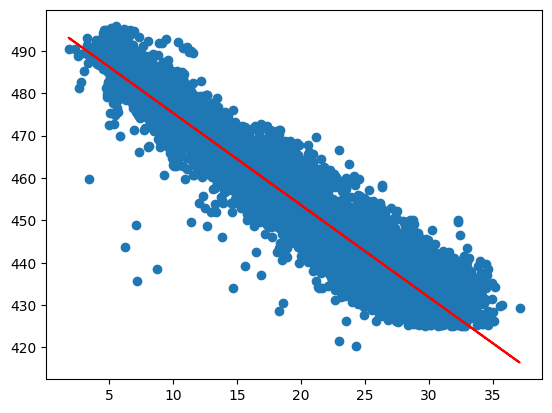

In [11]:
plt.scatter(X_AT["AT"].values, y["PE"].values)
y_pred = lr_at_model.predict(X_AT)
plt.plot(X_AT["AT"].values, y_pred, '-r')

Text(0.5, 1.0, "Cook's distance")

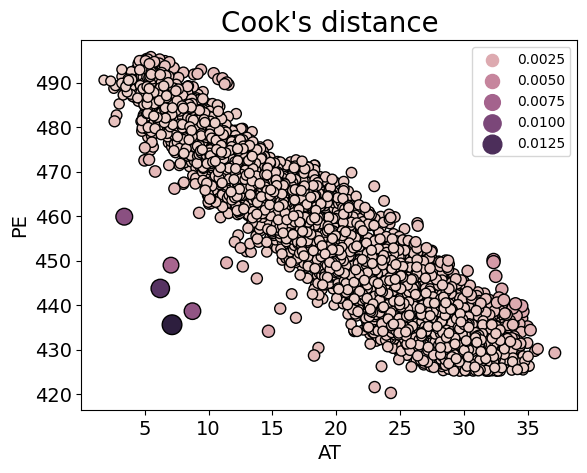

In [12]:
cook_distance = OLSInfluence(lr_at_model).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(X_AT["AT"], y["PE"], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('AT', fontsize=14)
plt.ylabel('PE', fontsize=14)
plt.title('Cook\'s distance', fontsize=20)

<AxesSubplot:>

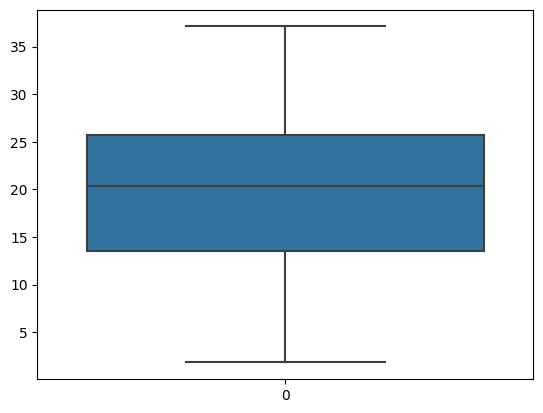

In [13]:
seaborn.boxplot(data=X_AT["AT"])

#### Linear Model with feature V

From the linear model summary with V as the feature, we can see that the p value is very low. This indicates that the feature under consideration is statistically significant. <br>

The data is plotted with x axis representing V feature and y axis representing PE dependent variable. The regression line generated by the statsmodel api is also plotted on same graph. The graph clearly shows that there is negative correlation between the feature and the output. <br>

Cook's distance is used to analyze the data for outliers. From the graph plotted, we can see there are a few data points with distance of 0.0018 and higher that are marked as outliers by Cook's distance. <br>

Box plots are also drawn to visualize any outliers.

In [14]:
X_V = data[["V"]]
X_V = sm.add_constant(X_V)
lr_v_model = sm.OLS(y, X_V).fit()
lr_v_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:45   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

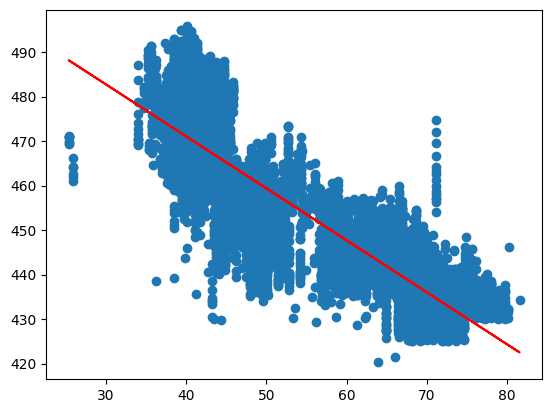

In [15]:
plt.scatter(X_V["V"].values, y["PE"].values)
y_pred = lr_v_model.predict(X_V)
plt.plot(X_V["V"].values, y_pred, '-r')

Text(0.5, 1.0, "Cook's distance")

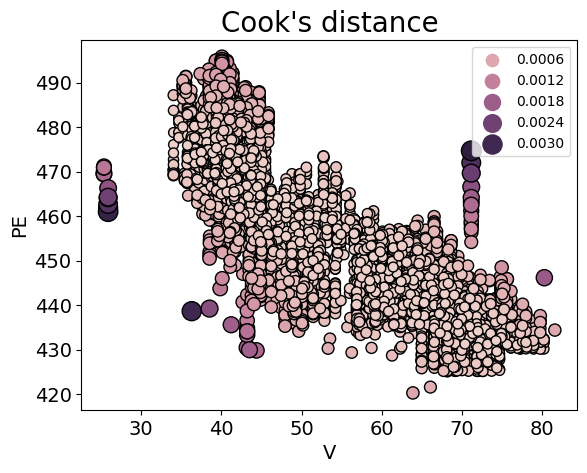

In [16]:
cook_distance = OLSInfluence(lr_v_model).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(X_V["V"], y["PE"], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('V', fontsize=14)
plt.ylabel('PE', fontsize=14)
plt.title('Cook\'s distance', fontsize=20)

<AxesSubplot:>

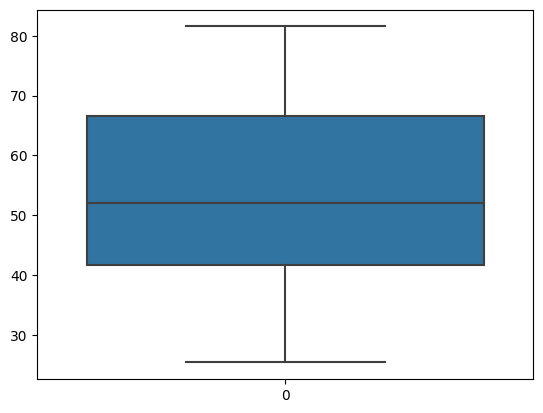

In [17]:
seaborn.boxplot(data=X_V["V"])

#### Linear Model with feature AP

From the linear model summary with AP as the feature, we can see that the p value is very low. This indicates that the feature under consideration is statistically significant. <br>

The data is plotted with x axis representing AP feature and y axis representing PE dependent variable. The regression line generated by the statsmodel api is also plotted on same graph. The graph clearly shows that there is positive correlation between the feature and the output. <br>

Cook's distance is used to analyze the data for outliers. From the graph plotted, we can see there are a few data points with distance of 0.0060 and higher that are marked as outliers by Cook's distance. <br>

Box plots are also drawn to visualize any outliers.

In [18]:
X_AP = data[["AP"]]
X_AP = sm.add_constant(X_AP)
lr_ap_model = sm.OLS(y, X_AP).fit()
lr_ap_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:46   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

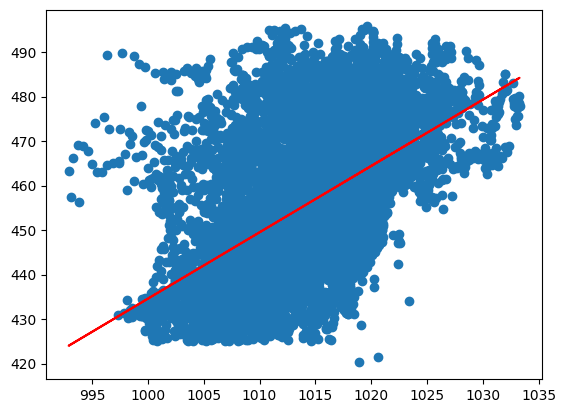

In [19]:
plt.scatter(X_AP["AP"].values, y["PE"].values)
y_pred = lr_ap_model.predict(X_AP)
plt.plot(X_AP["AP"].values, y_pred, '-r')

Text(0.5, 1.0, "Cook's distance")

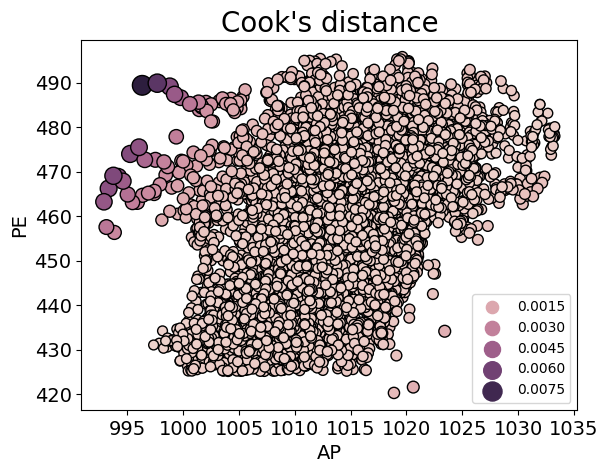

In [20]:
cook_distance = OLSInfluence(lr_ap_model).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(X_AP["AP"], y["PE"], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('AP', fontsize=14)
plt.ylabel('PE', fontsize=14)
plt.title('Cook\'s distance', fontsize=20)

<AxesSubplot:>

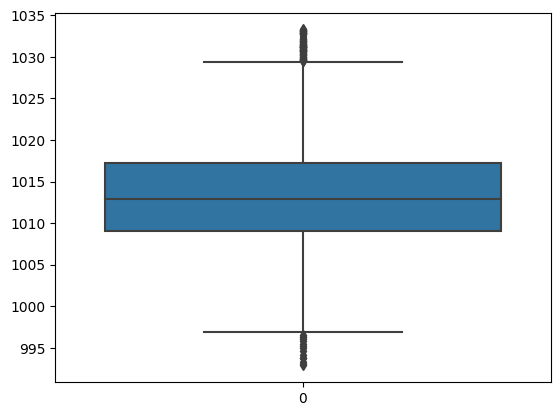

In [21]:
seaborn.boxplot(data=X_AP["AP"])

#### Linear Model with feature RH

From the linear model summary with RH as the feature, we can see that the p value is very low. This indicates that the feature under consideration is statistically significant. <br>

The data is plotted with x axis representing RH feature and y axis representing PE dependent variable. The regression line generated by the statsmodel api is also plotted on same graph. The graph clearly shows that there is positive correlation between the feature and the output.<br>

Cook's distance is used to analyze the data for outliers. From the graph plotted, we can see there are a few data points with distance of 0.0012 and higher that are marked as outliers by Cook's distance. <br>

Box plots are also drawn to visualize any outliers.

In [22]:
X_RH = data[["RH"]]
X_RH = sm.add_constant(X_RH)
lr_rh_model = sm.OLS(y, X_RH).fit()
lr_rh_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

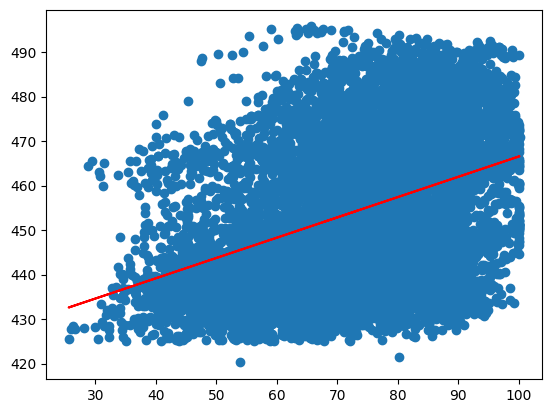

In [23]:
plt.scatter(X_RH["RH"].values, y["PE"].values)
y_pred = lr_rh_model.predict(X_RH)
plt.plot(X_RH["RH"].values, y_pred, '-r')

Text(0.5, 1.0, "Cook's distance")

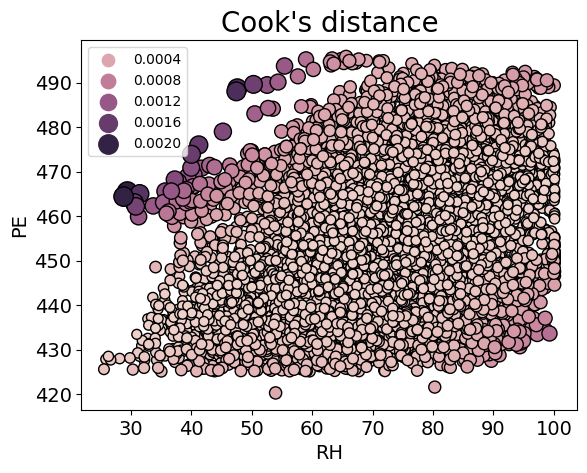

In [24]:
cook_distance = OLSInfluence(lr_rh_model).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(X_RH["RH"], y["PE"], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('RH', fontsize=14)
plt.ylabel('PE', fontsize=14)
plt.title('Cook\'s distance', fontsize=20)

<AxesSubplot:>

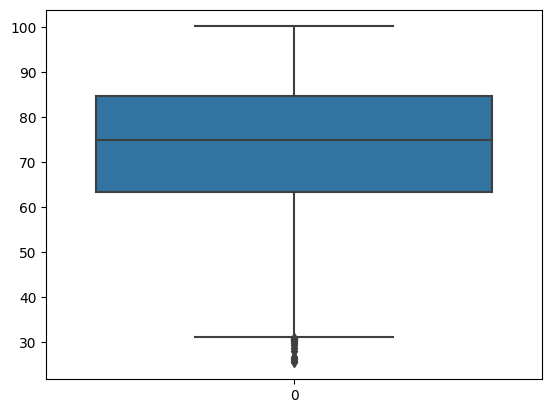

In [25]:
seaborn.boxplot(data=X_RH["RH"])

### d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

All the predictors have very low p value, this means all of them are statistically significant. For all the predictors, we can reject the null hypothesis

In [26]:
X = data[["AT", "V", "AP", "RH"]]
X = sm.add_constant(X)
y = data[["PE"]]
lr_model = sm.OLS(y, X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In 1c, we fitted linear model for each predictor. We saw that p value was low for all of these models. We could hence reject the null hypothesis on the basis of this and conclude that each predictor was statistically significant. <br>

In 1d, we fitted a multiple linear model with all predictors together. In this case as well, each predictor had very low p value thereby proving to be statistically significant for the model generation <br>

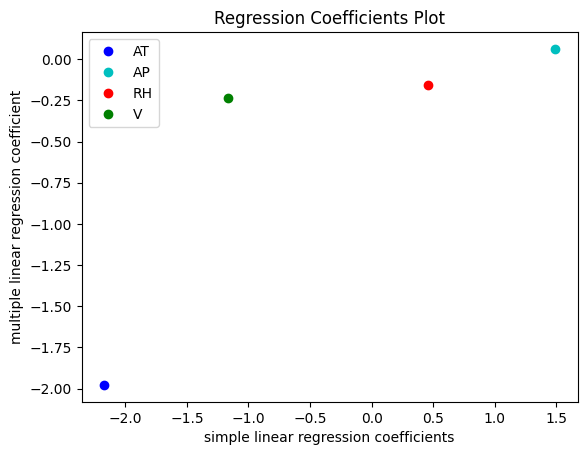

In [27]:
plt.title('Regression Coefficients Plot')
plt.plot(-2.1713, -1.9775, 'bo', label='AT')
plt.plot(1.4899, 0.0621, 'co', label='AP')
plt.plot(0.4557, -0.1581, 'ro', label='RH')
plt.plot(-1.1681, -0.2339, 'go', label='V')
plt.legend()
plt.xlabel('simple linear regression coefficients')
plt.ylabel('multiple linear regression coefficient')
plt.show()

### f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = β0 + β1X + β2X^2 + β3X^3 + e

#### AT Feature Non Linear model

All features - 'AT', 'AT^2', 'AT^3' are statistically signaficant as their p value is very low

| Model Feature | Actual Predictor  |
| ------------- | ----------------- |
| x1            | AT                |
| x2            | AT^2              |
| x3            | AT^3              |

In [28]:
poly = PolynomialFeatures(3)
current_data = X_AT[["AT"]]
X_AT_transformed = poly.fit_transform(current_data)
lr_at_trans_model = sm.OLS(y, X_AT_transformed).fit()
lr_at_trans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
poly.get_feature_names(current_data.columns)

['1', 'AT', 'AT^2', 'AT^3']

#### V Feature Non Linear model

Feature 'V^2' is statistically insignaficant as its p value is high. But V^3 is statistically significant as p value is low

| Model Feature | Actual Predictor  |
| ------------- | ----------------- |
| x1            | V                 |
| x2            | V^2               |
| x3            | V^3               |

In [30]:
current_data = X_V[["V"]]
X_V_transformed = poly.fit_transform(current_data)
lr_v_trans_model = sm.OLS(y, X_V_transformed).fit()
lr_v_trans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
poly.get_feature_names(current_data.columns)

['1', 'V', 'V^2', 'V^3']

#### AP Feature Non Linear model

All features - 'AP', 'AP^2', 'AP^3' are statistically signaficant as their p value is very low


| Model Feature | Actual Predictor  |
| ------------- | ----------------- |
| x1            | AP                |
| x2            | AP^2              |
| x3            | AP^3              |

In [32]:
current_data = X_AP[["AP"]]
X_AP_transformed = poly.fit_transform(current_data)
lr_ap_trans_model = sm.OLS(y, X_AP_transformed).fit()
lr_ap_trans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.000       0.057       0.092
x1            25.2556      3.001      8.415      0.000      19.372      31.139
x2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
x3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
poly.get_feature_names(current_data.columns)

['1', 'AP', 'AP^2', 'AP^3']

#### RH Feature Non Linear model

All features - 'RH', 'RH^2', 'RH^3' are statistically signaficant as their p value is very low

| Model Feature | Actual Predictor  |
| ------------- | ----------------- |
| x1            | RH                |
| x2            | RH^2              |
| x3            | RH^3              |

In [34]:
current_data = X_RH[["RH"]]
X_RH_transformed = poly.fit_transform(current_data)
lr_rh_trans_model = sm.OLS(y, X_RH_transformed).fit()
lr_rh_trans_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.000     447.744     489.083
x1            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
x2             0.0321      0.007      4.433      0.000       0.018       0.046
x3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
poly.get_feature_names(current_data.columns)

['1', 'RH', 'RH^2', 'RH^3']

### g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

##### The p value is low for following interaction terms - 
1. AT * V 
2. AT * RH
3. AP * V
4. AP * RH

In [36]:
data_interactions = data[["AT", "V", "AP", "RH"]]


data_interactions["AT V"] = data_interactions["AT"] * data_interactions["V"]
data_interactions["AT AP"] = data_interactions["AT"] * data_interactions["AP"]
data_interactions["AT RH"] = data_interactions["AT"] * data_interactions["RH"]
data_interactions["V AP"] = data_interactions["V"] * data_interactions["AP"]
data_interactions["V RH"] = data_interactions["V"] * data_interactions["RH"]
data_interactions["AP RH"] = data_interactions["AP"] * data_interactions["RH"]
data_interactions = sm.add_constant(data_interactions)

lr_interactions_model = sm.OLS(y, data_interactions).fit()
lr_interactions_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT V           0.0210      0.001     23.338      0.000       0.019       0.023
AT AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V AP           0.0068      0.001      5.135      0.000       0.004       0.009
V RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [37]:
X = data[["AT", "V", "AP", "RH"]]
y = data[["PE"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##### Model 1 - All predictors

In [38]:
X_train_copy = X_train.copy()
X_train_copy = sm.add_constant(X_train_copy)
X_test_copy = X_test.copy()
X_test_copy = sm.add_constant(X_test_copy)

lr_model = sm.OLS(y_train, X_train_copy).fit()

y_train_pred = lr_model.predict(X_train_copy)
y_test_pred = lr_model.predict(X_test_copy)
training_error = metrics.mean_squared_error(y_train, y_train_pred)
testing_error = metrics.mean_squared_error(y_test, y_test_pred)

print("Training error: " + str(training_error))
print("Testing error: " + str(testing_error))
lr_model.summary()

Training error: 20.580839725738688
Testing error: 21.23985693822534


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.000     445.293     490.390
AT            -2.0044      0.018   -110.340      0.000      -2.040      -1.969
V             -0.2271      0.009    -26.301      0.000      -0.244      -0.210
AP             0.0493      0.011      4.416      0.000       0.027       0.071
RH            -0.1600      0.005    -32.337      0.000      -0.170      -0.150
==============================================================================
Omnibus:                      703.168   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3512.957
Skew:                          -0.390   Prob(JB):                         0.00
Kurtosis:                       6.461   Cond. No.                     2.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model 2 - All predictors along with degree 2 of each predictors and interaction terms

In [39]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()


X_train_copy["AT^2"] = X_train_copy["AT"] * X_train_copy["AT"]
X_train_copy["AT V"] = X_train_copy["AT"] * X_train_copy["V"]
X_train_copy["AT AP"] = X_train_copy["AT"] * X_train_copy["AP"]
X_train_copy["AT RH"] = X_train_copy["AT"] * X_train_copy["RH"]
X_train_copy["V^2"] = X_train_copy["V"] * X_train_copy["V"]
X_train_copy["V AP"] = X_train_copy["V"] * X_train_copy["AP"]
X_train_copy["V RH"] = X_train_copy["V"] * X_train_copy["RH"]
X_train_copy["AP^2"] = X_train_copy["AP"] * X_train_copy["AP"]
X_train_copy["AP RH"] = X_train_copy["AP"] * X_train_copy["RH"]
X_train_copy["RH^2"] = X_train_copy["RH"] * X_train_copy["RH"]

X_test_copy["AT^2"] = X_test_copy["AT"] * X_test_copy["AT"]
X_test_copy["AT V"] = X_test_copy["AT"] * X_test_copy["V"]
X_test_copy["AT AP"] = X_test_copy["AT"] * X_test_copy["AP"]
X_test_copy["AT RH"] = X_test_copy["AT"] * X_test_copy["RH"]
X_test_copy["V^2"] = X_test_copy["V"] * X_test_copy["V"]
X_test_copy["V AP"] = X_test_copy["V"] * X_test_copy["AP"]
X_test_copy["V RH"] = X_test_copy["V"] * X_test_copy["RH"]
X_test_copy["AP^2"] = X_test_copy["AP"] * X_test_copy["AP"]
X_test_copy["AP RH"] = X_test_copy["AP"] * X_test_copy["RH"]
X_test_copy["RH^2"] = X_test_copy["RH"] * X_test_copy["RH"]

X_train_copy = sm.add_constant(X_train_copy)
X_test_copy = sm.add_constant(X_test_copy)

lr_model = sm.OLS(y_train, X_train_copy).fit()

y_train_pred = lr_model.predict(X_train_copy)
y_test_pred = lr_model.predict(X_test_copy)
training_error = metrics.mean_squared_error(y_train, y_train_pred)
testing_error = metrics.mean_squared_error(y_test, y_test_pred)
lr_r2_score = metrics.r2_score(y_test, y_test_pred)

print("Training error: " + str(training_error))
print("Testing error: " + str(testing_error))
lr_model.summary()

Training error: 17.88779961663329
Testing error: 18.647312478576204


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:48   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.000   -1.05e+04   -4862.572
AT            -7.2885      3.628     -2.009      0.045     -14.401      -0.176
V             -1.9590      1.765     -1.110      0.267      -5.420       1.502
AP            15.9308      2.772      5.746      0.000      10.496      21.366
RH             3.9121      1.028      3.805      0.000       1.897       5.928
AT^2           0.0185      0.004      5.031      0.000       0.011       0.026
AT V           0.0095      0.003      2.949      0.003       0.003       0.016
AT AP          0.0046      0.004      1.291      0.197      -0.002       0.011
AT RH         -0.0053      0.002     -2.963      0.003      -0.009      -0.002
V^2           -0.0004      0.001     -0.386      0.700      -0.002       0.001
V AP           0.0015      0.002      0.876      0.381      -0.002       0.005
V RH          -0.0001      0.001     -0.167      0.867      -0.002       0.001
AP^2          -0.0078      0.001     -5.765      0.000      -0.010      -0.005
AP RH         -0.0036      0.001     -3.623      0.000      -0.006      -0.002
RH^2          -0.0019      0.000     -6.065      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1187.007   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8209.369
Skew:                          -0.669   Prob(JB):                         0.00
Kurtosis:                       8.256   Cond. No.                     2.85e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model 3 - All predictors along with degree 2 of each predictors and interaction terms but without statistically significant terms
##### Terms removed are - V^2, AT AP, AP V, V RH
##### V also has high p value but as we are keeping certain interaction terms that involve V, we will be retaining the independent variable as well. 

In [40]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train_copy["AT^2"] = X_train_copy["AT"] * X_train_copy["AT"]
X_train_copy["AT V"] = X_train_copy["AT"] * X_train_copy["V"]
X_train_copy["AT RH"] = X_train_copy["AT"] * X_train_copy["RH"]
X_train_copy["AP^2"] = X_train_copy["AP"] * X_train_copy["AP"]
X_train_copy["AP RH"] = X_train_copy["AP"] * X_train_copy["RH"]
X_train_copy["RH^2"] = X_train_copy["RH"] * X_train_copy["RH"]
X_train_copy = sm.add_constant(X_train_copy)

X_test_copy["AT^2"] = X_test_copy["AT"] * X_test_copy["AT"]
X_test_copy["AT V"] = X_test_copy["AT"] * X_test_copy["V"]
X_test_copy["AT RH"] = X_test_copy["AT"] * X_test_copy["RH"]
X_test_copy["AP^2"] = X_test_copy["AP"] * X_test_copy["AP"]
X_test_copy["AP RH"] = X_test_copy["AP"] * X_test_copy["RH"]
X_test_copy["RH^2"] = X_test_copy["RH"] * X_test_copy["RH"]
X_test_copy = sm.add_constant(X_test_copy)


lr_model = sm.OLS(y_train, X_train_copy).fit()

y_train_pred = lr_model.predict(X_train_copy)
y_test_pred = lr_model.predict(X_test_copy)
training_error = metrics.mean_squared_error(y_train, y_train_pred)
testing_error = metrics.mean_squared_error(y_test, y_test_pred)

print("Training error: " + str(training_error))
print("Testing error: " + str(testing_error))
lr_model.summary()

Training error: 17.917812671185377
Testing error: 18.694346190807615


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:54:48   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.046e+04   1091.512     -9.581      0.000   -1.26e+04   -8317.797
AT            -2.4293      0.100    -24.221      0.000      -2.626      -2.233
V             -0.4542      0.032    -14.187      0.000      -0.517      -0.391
AP            21.1531      2.158      9.804      0.000      16.924      25.383
RH             5.6754      0.755      7.512      0.000       4.194       7.156
AT^2           0.0170      0.002      7.478      0.000       0.013       0.021
AT V           0.0080      0.001      5.509      0.000       0.005       0.011
AT RH         -0.0069      0.001     -7.937      0.000      -0.009      -0.005
AP^2          -0.0102      0.001     -9.558      0.000      -0.012      -0.008
AP RH         -0.0053      0.001     -7.244      0.000      -0.007      -0.004
RH^2          -0.0021      0.000     -7.638      0.000      -0.003      -0.002
==============================================================================
Omnibus:                     1192.150   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8095.922
Skew:                          -0.679   Prob(JB):                         0.00
Kurtosis:                       8.213   Cond. No.                     2.17e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Three models were tested against same train and test data 
1. Model 1 - All predictors 
2. Model 2 - All predictors along with degree 2 of each predictors and interaction terms
3. Model 3 - All predictors along with degree 2 of each predictors and interaction terms but without statistically significant terms

Model 1 <br>
Training error: 20.580839725738688 <br>
Testing error: 21.23985693822534 <br>

Model 2 <br>
Training error: 17.88779961663329 <br>
Testing error: 18.647312478576204 <br>

Model 3 <br>
Training error: 17.917812671185377 <br>
Testing error: 18.694346190807615 <br>

Model 2 performed the best even though it had a few statistically not significant terms. <br>

Model 3 which was all features with statistically insignificant terms removed performed better than model 1 but not better than model 2. But its train and test error are very close to model 2

### i) KNN Regression: Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

The best k value for raw features is: 5
The best test error for raw features is: 15.726819842563568


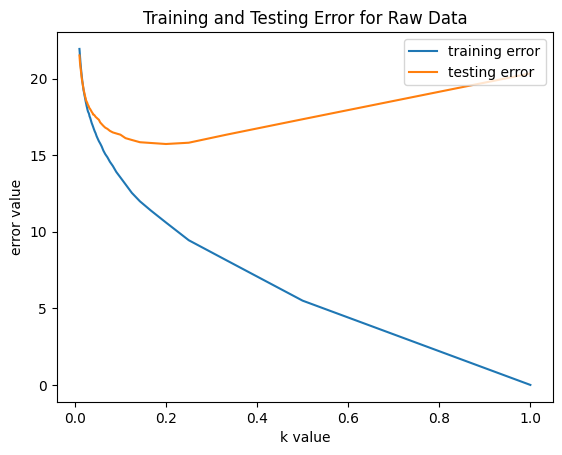

In [41]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

best_test_error = 1000
knn_r2_score = 0
best_k = -1

train_error = {}
test_error = {}
k = 1
while k <= 100:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_copy, y_train)
    y_train_pred = knn_regressor.predict(X_train_copy)
    y_test_pred = knn_regressor.predict(X_test_copy)
    training_error = metrics.mean_squared_error(y_train, y_train_pred)
    testing_error = metrics.mean_squared_error(y_test, y_test_pred)
    train_error[1/k] = training_error
    test_error[1/k] = testing_error
    
    if best_test_error > testing_error:
        best_test_error = testing_error
        knn_r2_score = metrics.r2_score(y_test, y_test_pred)
        best_k = k
    k = k + 1
    
print("The best k value for raw features is: " + str(best_k))
print("The best test error for raw features is: " + str(best_test_error))
plt.plot(*zip(*sorted(train_error.items())), label='training error')
plt.plot(*zip(*sorted(test_error.items())), label='testing error')
plt.title("Training and Testing Error for Raw Data")
plt.xlabel("k value")
plt.ylabel("error value")
plt.legend(loc='upper right')
plt.show()

The best k value for normalized features is: 4
The best test error for normalized features is: 14.291333431295715


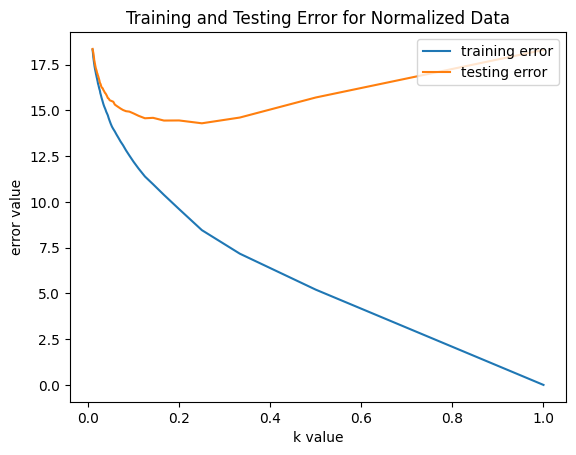

In [42]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

scaler = MinMaxScaler()
scaler.fit(X_train_copy)
X_train_copy_transformed = scaler.transform(X_train_copy)
X_test_copy_transformed = scaler.transform(X_test_copy)
knn_scaled_r2_score = 0
train_error = {}
test_error = {}
best_test_error_scaled = 1000
best_k_scaled = -1
k = 1
while k <= 100:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_copy_transformed, y_train)
    y_train_pred = knn_regressor.predict(X_train_copy_transformed)
    y_test_pred = knn_regressor.predict(X_test_copy_transformed)
    training_error = metrics.mean_squared_error(y_train, y_train_pred)
    testing_error = metrics.mean_squared_error(y_test, y_test_pred)
    train_error[1/k] = training_error
    test_error[1/k] = testing_error
    if best_test_error_scaled > testing_error:
        best_test_error_scaled = testing_error
        knn_scaled_r2_score = metrics.r2_score(y_test, y_test_pred)
        best_k_scaled = k
    k = k + 1
    
    
print("The best k value for normalized features is: " + str(best_k_scaled))
print("The best test error for normalized features is: " + str(best_test_error_scaled))
plt.plot(*zip(*sorted(train_error.items())), label='training error')
plt.plot(*zip(*sorted(test_error.items())), label='testing error')
plt.title("Training and Testing Error for Normalized Data")
plt.xlabel("k value")
plt.ylabel("error value")
plt.legend(loc='upper right')
plt.show()

### j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

##### R2 score is being used to compare the regression models to know which is performing better. R2 score can be used for any type of regression models and higher score indicates better fit to the data and hence better performance.¶

##### KNN (scaled features)  has least best MSE value and higher R2 score and hence is having a better fit for the data 

| Model              | Best MSE  | R2 Score  |
| ------------------ | --------- | --------- |
| KNN raw            | 15.72     | 0.946     |
| KNN scaled         | 14.29     | 0.951     |
| Linear Regression  | 18.65     | 0.936     |

##### KNN (raw features) for the best k value with least test error

In [43]:
print("KNN raw best k value: " + str(best_k))
print("KNN raw best test error: " + str(best_test_error))
print("KNN raw R2 score: " + str(knn_r2_score))

KNN raw best k value: 5
KNN raw best test error: 15.726819842563568
KNN raw R2 score: 0.946354076302882


##### KNN (normalized features) for the best k value with least test error

In [44]:
print("KNN scaled best k value: " + str(best_k_scaled))
print("KNN scaled best test error: " + str(best_test_error_scaled))
print("KNN scaled R2 score: " + str(knn_scaled_r2_score))

KNN scaled best k value: 4
KNN scaled best test error: 14.291333431295715
KNN scaled R2 score: 0.9512506793833541


##### Model 2 - All predictors along with degree 2 of each predictors and interaction terms

In [45]:
# This value is hardcoded from the output of question (h)
print("L2 best test error: " + str(18.647312478576204))
print("LR R2 score: " + str(lr_r2_score))

L2 best test error: 18.647312478576204
LR R2 score: 0.9363919525755214


## 2. ISLR 2.4.1

### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

##### a) The sample size n is extremely large, and the number of predictors p is small.

Flexible model will perform better. <br>
<br>
With large sample size, we have more data that belongs to the distribution which helps us get better understanding of the distribution to which the sample belongs. This sample may have noise as well. But a flexible model will surely be better to capture every essence of the distribution and will be able to fit data better than an inflexible model.

##### b) The number of predictors p is extremely large, and the number of observations n is small.

Flexible model will perform bad. <br>
<br>

If we have very small dataset of size n and predictors p is extremely large, this leads to decreasing the degrees of freedom. This inturn results in larger tail for t distribution. Rejecting null in this case becomes harder. A flexible model in this case might get overfitted to the data and result in a bad model. An inflexible model will work better in this case.

##### c) The relationship between the predictors and response is highly non-linear.

Flexible model will perform better. <br>
<br>

A flexible model would be better in this case as it can accomodate for the non linear shapes while fitting the data. If a polynomial function of higher degree is better suitable to a dataset, then a linear inflexible model will not perform well when compared to flexible method

##### d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

Flexible model will perform bad. <br>
<br>

Variance of error term being high leads to higher standard error of the regression coefficients. This is because more noise in data means more error. If data has lot of noise, then a flexible model in this case would be fitting to the noise more than the actual data thereby not being able to model the actual distribution. Hence, an inflexible model would be better in this case.

## 3. ISLR: 2.4.7

### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

| Obs | X1  | X2  | X3  | Y     |
| --- | --- | --- | --- | ----- |
| 1   | 0   |  3  |  0  | Red   |
| 2   | 2   |  0  |  0  | Red   |
| 3   | 0   |  1  |  3  | Red   |
| 4   | 0   |  1  |  2  | Green |
| 5   | -1  |  0  |  1  | Green |
| 6   | 1   |  1  |  1  | Red   |


##### a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

| Obs | X1  | X2  | X3  | Euclidean Distance                            |
| --- | --- | --- | --- | --------------------------------------------- |
| 1   | 0   |  3  |  0  | (0-0)^2 + (0-3)^2 + (0-0)^2 = sqrt(9) = 3     |
| 2   | 2   |  0  |  0  | (0-2)^2 + (0-0)^2 + (0-0)^2 = sqrt(4) = 2     |
| 3   | 0   |  1  |  3  | (0-0)^2 + (0-1)^2 + (0-3)^2 = sqrt(10) = 3.16 |
| 4   | 0   |  1  |  2  | (0-0)^2 + (0-1)^2 + (0-2)^2 = sqrt(5) = 2.23  |
| 5   | -1  |  0  |  1  | (0+1)^2 + (0-0)^2 + (0-1)^2 = sqrt(2) = 1.414 |
| 6   | 1   |  1  |  1  | (0-1)^2 + (0-1)^2 + (0-1)^2 = sqrt(3) = 1.732 |

##### b) What is our prediction with K = 1? Why?

With k = 1, we have 5th sample closest to our data and hence we classify the test sample (X1 = X2 = X3 = 0) as Green

##### c) What is our prediction with K = 3? Why?

With k = 3, we have <br>
1. sample 5 - 1.414 - Green 
2. sample 6 - 1.732 - Red
3. sample 2 - 2.0   - Red

Using polling system with these 3 samples, we classify the test sample (X1 = X2 = X3 = 0) as Red (2 votes)

##### d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

As k value increases, the non linearity in the decision boundary decreases and the model becomes inflexible. So if the Bayes decision boundary in this problem is highly nonlinear, we expect k to be small so as to be flexible and accomodate for non linearity in the data